In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install xgboost
pip install --upgrade xgboost
pip install eli5
pip install shap
!pip install category_encoders
pip install shapash
!pip install datatable

In [ ]:
from xgboost import XGBClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score
import shap


import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
col_names = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
heart = pd.read_csv("heart.csv", header=0, names=col_names)
print(heart.head())

   age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   52    1                0                     125          212   
1   53    1                0                     140          203   
2   70    1                0                     145          174   
3   61    1                0                     148          203   
4   62    0                0                     138          294   

   fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                    0         1                      168   
1                    1         0                      155   
2                    0         1                      125   
3                    0         1                      161   
4                    1         1                      106   

   exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
0                        0            1.0         2                  2   
1                        1            3.1         0                  0

In [ ]:
print(heart.groupby('target').count())
print(heart.info())

feature_cols = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']
X = heart[feature_cols]
y = heart.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('train size is %i'%y_train.shape[0])
print('test size is %i'%y_test.shape[0])

train size is 717
test size is 308


In [ ]:
xgbm = XGBClassifier(max_depth = 7 , learning_rate = 0.25 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)
xgbm.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
xgbm.score(X_train , y_train)


0.99581589958159

In [ ]:
xgbm.score(X_test , y_test)

0.9772727272727273

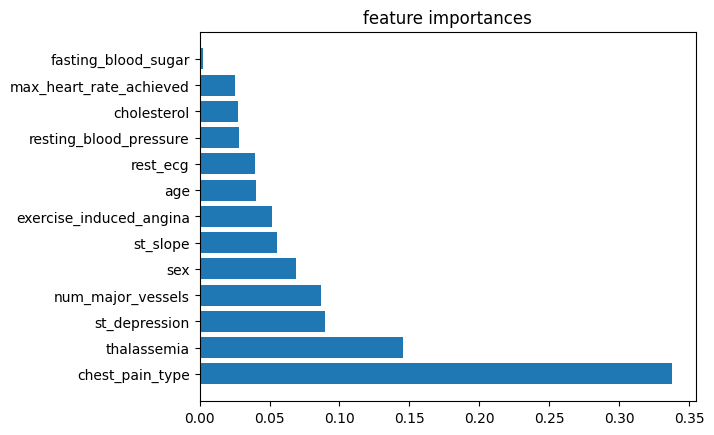

In [ ]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()
features_names = list(heart.columns)
f_importances(abs(xgbm.feature_importances_), features_names, top=13)

In [ ]:
y_pred = xgbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.73%


In [ ]:
report=metrics.classification_report(y_test,y_pred)
clf_name_rf=['XGBoost Heart Disease','RegLog']
print('Reporting for %s:'%clf_name_rf)
print(report)

Reporting for ['XGBoost Heart Disease', 'RegLog']:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       161
           1       0.99      0.97      0.98       147

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



0.9767820171546879


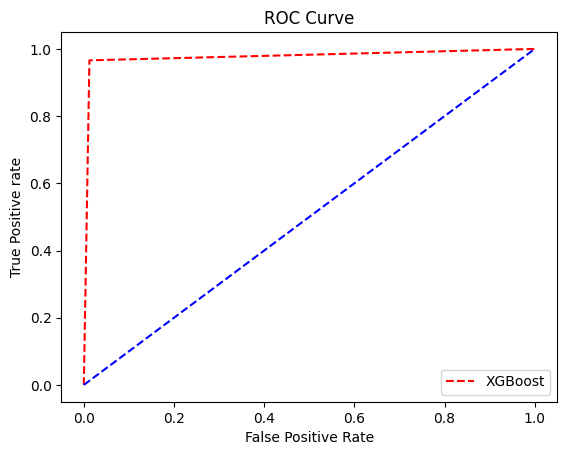

In [ ]:
fpr, tpr, thresh = roc_curve(y_test, y_pred[:], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score = roc_auc_score(y_test, y_pred[:])
print(auc_score)

plt.plot(fpr, tpr, linestyle= '--', color='red', label='XGBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[159   2]
 [  5 142]]


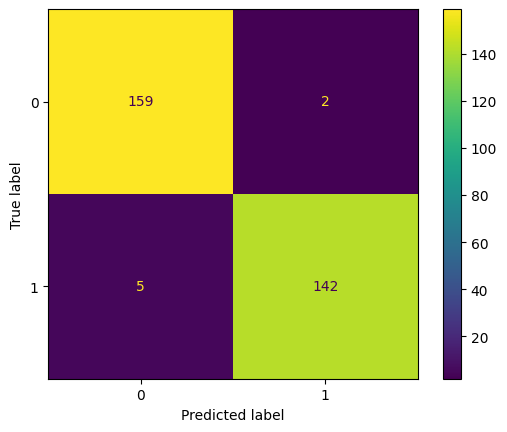

In [ ]:
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split
import shapash
import shap
import datatable as dt
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from shapash.utils.load_smartpredictor import load_smartpredictor
from shapash.explainer.smart_explainer import SmartExplainer

In [ ]:
domain_features_dict = {
    'age':'age', 'sex':'sex', 'cpt':'chest_pain_type',
     'rbp':'resting_blood_pressure', 'ch':'cholesterol', 'fbs':'fasting_blood_sugar', 're':'rest_ecg',
     'mhra':'max_heart_rate_achieved','eia':'exercise_induced_angina', 'dep':'st_depression', 'sl':'st_slope', 'nmv':'num_major_vessels', 'thal':'thalassemia'
}

xpl = SmartExplainer(model=xgbm, features_dict=domain_features_dict)
xpl.compile(
    x=X_test)

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



In [ ]:
app = xpl.run_app(title_story='Heart Diease Explanation')

Dash is running on http://0.0.0.0:8050/



/usr/local/lib/python3.9/dist-packages/shapash/webapp/smart_app.py:354: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.

INFO:dash.dash:Dash is running on http://0.0.0.0:8050/



In [ ]:
xpl.plot.features_importance()

 * Serving Flask app 'shapash.webapp.smart_app'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8050
 * Running on http://172.28.0.12:8050
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
xpl.plot.contribution_plot('chest_pain_type')
#xpl.plot.local_plot(index=79)

In [ ]:
xpl.plot.contribution_plot('st_depression')

In [ ]:
xpl.plot.contribution_plot('thalassemia')


In [ ]:
xpl.plot.contribution_plot('num_major_vessels')

In [ ]:
xpl.plot.contribution_plot('age')

In [ ]:
xpl.plot.contribution_plot('st_slope')

In [ ]:
xpl.plot.contribution_plot('sex')

In [ ]:
xpl.plot.contribution_plot('cholesterol')

In [ ]:
xpl.plot.contribution_plot('max_heart_rate_achieved')

In [ ]:
xpl.plot.contribution_plot('resting_blood_pressure')

In [ ]:
xpl.plot.contribution_plot('exercise_induced_angina')

In [ ]:
xpl.plot.contribution_plot('rest_ecg')

In [ ]:
xpl.plot.contribution_plot('fasting_blood_sugar')

In [ ]:
xpl.plot.top_interactions_plot(nb_top_interactions=5)

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

